In [2]:
from src.collision import CollisionDetector
obj_folder = "/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/segmentation"

In [3]:
t = CollisionDetector(obj_folder=obj_folder, skeleton_toml_path="skeleton.toml", pose_csv="./tracking/28/240905-1616_session28_track99_points3d.csv", obj_ref_frame=2599, obj_transform_toml=f"{obj_folder}/240905-1616_seed_session28_first.toml")

In [ ]:
from src.object import CollisionObj
raw_mesh = CollisionObj(obj_folder=obj_folder)

In [ ]:
from src.animal import AnimalList
track_folder = "/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking"
A = AnimalList("skeleton.toml", track_folder, session_number=28)

In [ ]:
from src.visual_widget import MultiViewer
V = MultiViewer(A.animals, [t.obj], 0)

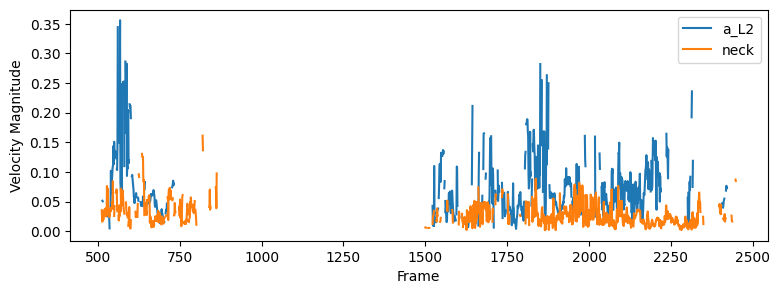

In [5]:
from scripts.tools.x_y_z_plot import KPPosition, KPVelocityXYZ, KPVelocityMag

KP = KPVelocityMag(t.animal, node=['a_L2', 'neck'], window_size=20)